In [7]:
import kagglehub
# 1. Define the dataset handle
dataset_handle = "kundanbedmutha/hotel-booking-reservation"

# 2. Download the dataset and get the path to the downloaded directory
path_to_dataset_dir = kagglehub.dataset_download(dataset_handle)

print(f"Dataset downloaded to: {path_to_dataset_dir}")

/Users/lewisliu/intelligent-systems/p3-ml/.venv/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 3.48M/3.48M [00:00<00:00, 24.8MB/s]

Extracting files...
Dataset downloaded to: /Users/lewisliu/.cache/kagglehub/datasets/kundanbedmutha/hotel-booking-reservation/versions/1


In [8]:
import pandas as pd
import os

# 1. Define the specific file name within the downloaded folder
file_name = "hotel_bookings_updated_2024.csv" 

# 2. Construct the full path to the CSV file
full_file_path = os.path.join(path_to_dataset_dir, file_name)

# 3. Load the data into a DataFrame
df = pd.read_csv(full_file_path)

In [9]:
# Clean data
df = df.dropna(axis=0)

df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'city'],
      dtype='object')

## Ensemble Models and Performance Comparison (Liu)

In [10]:
from sklearn.model_selection import train_test_split

# Drop rows with missing target values
df_clean = df.dropna(subset=['is_canceled'])   # adjust target column if needed

# Separate features (X) and target (y)
X = df_clean.drop('is_canceled', axis=1)  # target column
y = df_clean['is_canceled']

# Convert categorical columns to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((173, 335), (44, 335))

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print("Random Forest Accuracy:", rf_acc)
print("Random Forest F1 Score:", rf_f1)

Random Forest Accuracy: 0.9772727272727273
Random Forest F1 Score: 0.6666666666666666


In [12]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)

gb_acc = accuracy_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)

print("Gradient Boosting Accuracy:", gb_acc)
print("Gradient Boosting F1 Score:", gb_f1)

Gradient Boosting Accuracy: 1.0
Gradient Boosting F1 Score: 1.0


In [13]:
print("MODEL COMPARISON")
print("-----------------")
print(f"Random Forest     | Accuracy: {rf_acc:.4f} | F1: {rf_f1:.4f}")
print(f"Gradient Boosting | Accuracy: {gb_acc:.4f} | F1: {gb_f1:.4f}")

MODEL COMPARISON
-----------------
Random Forest     | Accuracy: 0.9773 | F1: 0.6667
Gradient Boosting | Accuracy: 1.0000 | F1: 1.0000


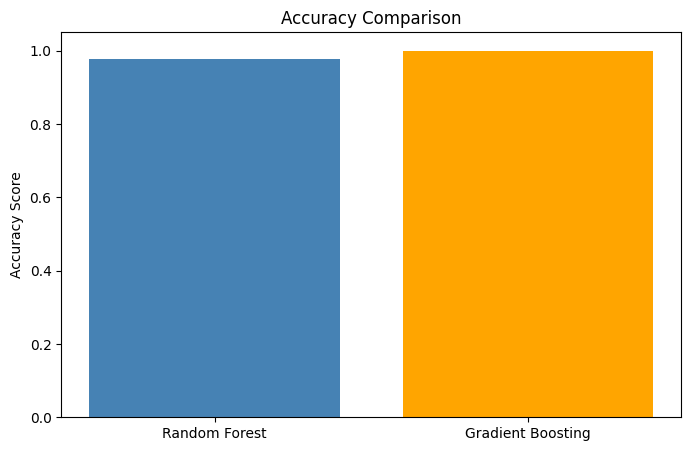

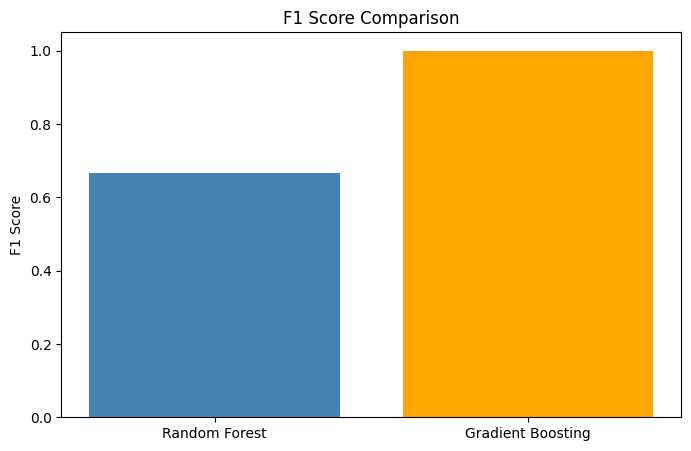

In [14]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'Gradient Boosting']
accuracy_scores = [rf_acc, gb_acc]
f1_scores = [rf_f1, gb_f1]

plt.figure(figsize=(8,5))
plt.bar(models, accuracy_scores, color=['steelblue','orange'])
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.show()

plt.figure(figsize=(8,5))
plt.bar(models, f1_scores, color=['steelblue','orange'])
plt.title("F1 Score Comparison")
plt.ylabel("F1 Score")
plt.show()